In [1]:
import pyabf
import matplotlib.pyplot as plt


In [27]:
print(abf.channelList)
print(abf.headerText) # display header information in the console


[0, 1]

### ABF Class Methods ###
abf.launchInClampFit()
abf.saveABF1()
abf.setSweep()
abf.sweepD()

### ABF Class Variables ###
abfDateTime = 2015-10-08 16:32:37.968000
abfDateTimeString = 2015-10-08T16:32:37.968
abfFileComment =
abfFilePath = /external/rprshnas01/netdata_kcni/stlab/valiante_lab_ephys_mar_2020/L5/Homeira/Total5Homeira-Last-Version - without 2020 Data/15o08038.abf
abfFolderPath = /external/rprshnas01/netdata_kcni/stlab/valiante_lab_ephys_mar_2020/L5/Homeira/Total5Homeira-Last-Version - without 2020 Data
abfID = 15o08038
abfVersion = {'major': 1, 'minor': 8, 'bugfix': 3, 'build': 0}
abfVersionString = 1.8.3.0
adcNames = ['Iclamp', 'Input07']
adcUnits = ['mV', 'mV']
channelCount = 2
channelList = [0, 1]
creator = Clampex 9.2.0.9
creatorVersion = {'major': 9, 'minor': 2, 'bugfix': 0, 'build': 9}
creatorVersionString = 9.2.0.9
dacNames = ['Cmd 0', 'Cmd 1', 'AO #2', 'AO #3']
dacUnits = ['pA', 'pA', 'mV', 'mV']
data = [[-2.7936 -2.7939 -2.7924 ... -2.7319 -2.7332 -2.7328]
[ 

/nethome/kcni/stripathy/.local/lib/python3.6/site-packages/pyabf/abfHeaderDisplay.py:83: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if value == "~SECTION~":
/nethome/kcni/stripathy/.local/lib/python3.6/site-packages/pyabf/abfHeaderDisplay.py:85: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif value == "~DOCS~":


In [49]:
#fn = '/external/rprshnas01/netdata_kcni/stlab/valiante_lab_ephys_mar_2020/L5/Homeira/Total5Homeira-Last-Version - without 2020 Data/19320041.abf'


fn = '/external/rprshnas01/netdata_kcni/stlab/valiante_lab_ephys_mar_2020/L5/Homeira/Total5Homeira-Last-Version - without 2020 Data/13d02049.abf'
# 2016_02_04_0042.abf - example from cluster 3 - burst firing
# 13d02049.abf - example from cluster 1

abf = pyabf.ABF(fn)
abf.setSweep(1, channel= 0)
print(abf.sweepY) # displays sweep data (ADC)
print(abf.sweepX) # displays sweep times (seconds)
print(abf.sweepC) # displays command waveform (DAC)
#plt.figure(figsize=(8, 5))
#plt.plot(abf.sweepX, abf.sweepY)
#plt.show()
for i in [16]:
    abf.setSweep(i, channel=2)
    plt.plot(abf.sweepX, abf.sweepY/5, alpha=.5, label="sweep %d" % (i))
    #plt.plot(abf.sweepX, abf.sweepY/5, alpha=.5, label="sweep %d" % (i))
    plt.legend()
    plt.ax
    
plt.show()

[-2.9062 -2.9041 -2.9034 ... -2.926  -2.926  -2.9263]
[0.     0.0001 0.0002 ... 4.152  4.1521 4.1522]
[0. 0. 0. ... 0. 0. 0.]


ValueError: Sweep 16 not available (must be 0 - 14)

/opt/miniconda3/envs/jupyterhub/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


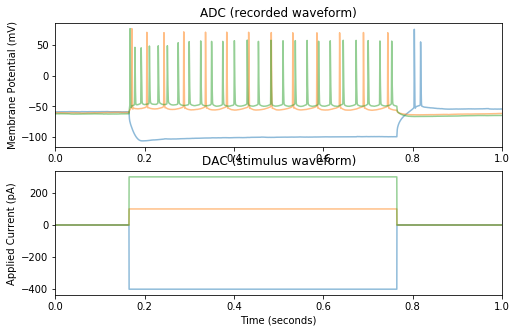

In [77]:
fn = '/external/rprshnas01/netdata_kcni/stlab/valiante_lab_ephys_mar_2020/L5/Homeira/Total5Homeira-Last-Version - without 2020 Data/13d02049.abf'
# 13d02049.abf - example from cluster 1

abf = pyabf.ABF(fn)

sweep_num = 0
sweep_plot_list = [0, 10, 14]

stim_channel_num = 0
stim_gain = 1000
stim_end = 1

fig = plt.figure(figsize=(8, 5))

for i in sweep_plot_list:
    sweep_num = i
    abf.setSweep(sweep_num, channel=stim_channel_num)

    # plot the ADC (voltage recording)
    ax1 = fig.add_subplot(211)
    ax1.set_title("ADC (recorded waveform)")
    ax1.plot(abf.sweepX, abf.sweepY*20, alpha = .5)

    # plot the DAC (clamp current)
    ax2 = fig.add_subplot(212, sharex=ax1)  # <-- this argument is new
    ax2.set_title("DAC (stimulus waveform)")
    ax2.plot(abf.sweepX, abf.sweepC * stim_gain, alpha = .5)

# decorate the plots
ax1.set_ylabel(abf.sweepLabelY)
ax2.set_xlabel(abf.sweepLabelX)
ax2.set_ylabel(abf.sweepLabelC)
ax1.axes.set_xlim(0, stim_end)  # <-- adjust axis like this
plt.show()

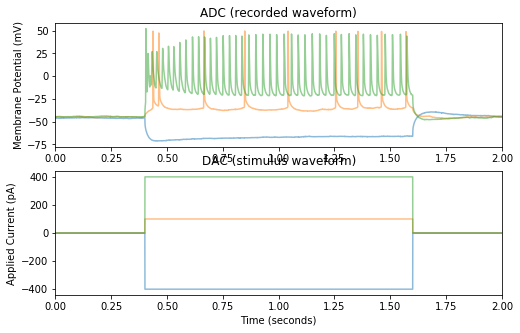

In [41]:
file_base_base_path = '/Users/stripathy/Downloads/'
file_base_path = 'valiante_lab_ephys_mar_2020/L5/Homeira/Total5Homeira-Last-Version - with 2020 Data/'
curr_file = '2016_02_04_0042.abf'
fn = file_base_base_path + file_base_path + curr_file
# 2016_02_04_0042.abf - example from cluster 4 - burst firing
# 13d02049.abf - example from cluster 1

abf = pyabf.ABF(fn)
stim_channel_num = 1
response_chan_num = 0
stim_gain = 1
response_gain = 20

stim_end = 2

sweep_num = 0
sweep_plot_list = [0, 10, 16]
fig = plt.figure(figsize=(8, 5))

for i in sweep_plot_list:
    sweep_num = i
    abf.setSweep(sweep_num, channel=response_chan_num)
    # plot the ADC (voltage recording)
    ax1 = fig.add_subplot(211)
    ax1.set_title("ADC (recorded waveform)")
    ax1.plot(abf.sweepX, abf.sweepY*response_gain, alpha = .5)

    # plot the DAC (clamp current)
    ax2 = fig.add_subplot(212, sharex=ax1)  # <-- this argument is new
    ax2.set_title("DAC (stimulus waveform)")
    abf.setSweep(sweep_num, channel=stim_channel_num)
    abf.setSweep(sweep_num, channel=1)
    ax2.plot(abf.sweepX, abf.sweepC * stim_gain, alpha = .5)

# decorate the plots
ax1.set_ylabel(abf.sweepLabelY)
ax2.set_xlabel(abf.sweepLabelX)
ax2.set_ylabel(abf.sweepLabelC)
ax1.axes.set_xlim(0, stim_end)  # <-- adjust axis like this
plt.show()

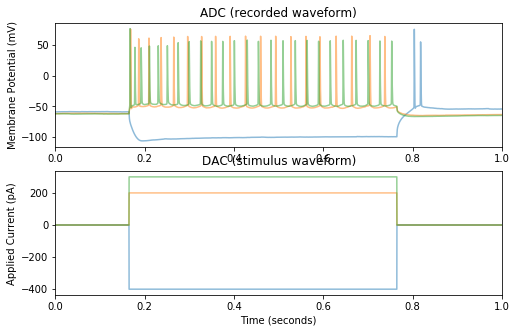

In [35]:
# example from cluster 1 - regular spiking
curr_file = '13d02049.abf'
fn = file_base_base_path + file_base_path + curr_file

# 13d02049.abf - example from cluster 1

abf = pyabf.ABF(fn)
stim_channel_num = 0
response_chan_num = 0
stim_gain = 1000

stim_end = 1

sweep_num = 0
sweep_plot_list = [0, 12, 14]
fig = plt.figure(figsize=(8, 5))

for i in sweep_plot_list:
    sweep_num = i
    abf.setSweep(sweep_num, channel=response_chan_num)
    # plot the ADC (voltage recording)
    ax1 = fig.add_subplot(211)
    ax1.set_title("ADC (recorded waveform)")
    ax1.plot(abf.sweepX, abf.sweepY*response_gain, alpha = .5)

    # plot the DAC (clamp current)
    ax2 = fig.add_subplot(212, sharex=ax1)  # <-- this argument is new
    ax2.set_title("DAC (stimulus waveform)")
    abf.setSweep(sweep_num, channel=stim_channel_num)
    #abf.setSweep(sweep_num, channel=1)
    ax2.plot(abf.sweepX, abf.sweepC * stim_gain, alpha = .5)

# decorate the plots
ax1.set_ylabel(abf.sweepLabelY)
ax2.set_xlabel(abf.sweepLabelX)
ax2.set_ylabel(abf.sweepLabelC)
ax1.axes.set_xlim(0, stim_end)  # <-- adjust axis like this
plt.show()

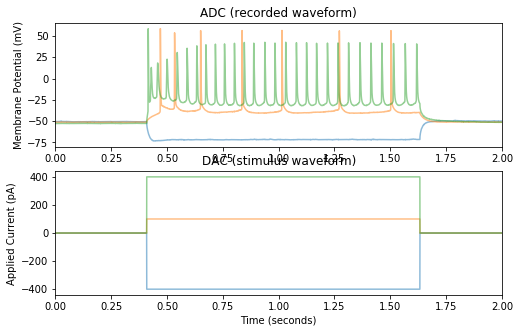

In [36]:
# example from cluster 2 - seems very similar to burst firing cluster
curr_file = '15o08032.abf'
fn = file_base_base_path + file_base_path + curr_file
# 2016_02_04_0042.abf - example from cluster 4 - burst firing
# 13d02049.abf - example from cluster 1

abf = pyabf.ABF(fn)
stim_channel_num = 1
response_chan_num = 0
stim_gain = 1
response_gain = 20

stim_end = 2

sweep_num = 0
sweep_plot_list = [0, 10, 16]
fig = plt.figure(figsize=(8, 5))

for i in sweep_plot_list:
    sweep_num = i
    abf.setSweep(sweep_num, channel=response_chan_num)
    # plot the ADC (voltage recording)
    ax1 = fig.add_subplot(211)
    ax1.set_title("ADC (recorded waveform)")
    ax1.plot(abf.sweepX, abf.sweepY*response_gain, alpha = .5)

    # plot the DAC (clamp current)
    ax2 = fig.add_subplot(212, sharex=ax1)  # <-- this argument is new
    ax2.set_title("DAC (stimulus waveform)")
    abf.setSweep(sweep_num, channel=stim_channel_num)
    abf.setSweep(sweep_num, channel=1)
    ax2.plot(abf.sweepX, abf.sweepC * stim_gain, alpha = .5)

# decorate the plots
ax1.set_ylabel(abf.sweepLabelY)
ax2.set_xlabel(abf.sweepLabelX)
ax2.set_ylabel(abf.sweepLabelC)
ax1.axes.set_xlim(0, stim_end)  # <-- adjust axis like this
plt.show()

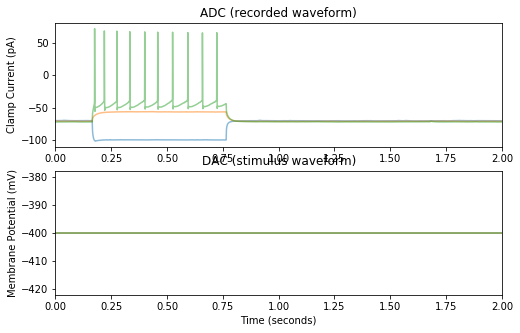

In [271]:
# example from cluster 3 
curr_file = '20140127_600_1_0158.abf'

#curr_file = '15o08020.abf'

meta_row = meta_dict.loc[meta_dict['File Names'] == curr_file]

fn = file_base_base_path + file_base_path + curr_file
# 2016_02_04_0042.abf - example from cluster 4 - burst firing
# 13d02049.abf - example from cluster 1

abf = pyabf.ABF(fn)

num_sweeps = abf.sweepCount - 1
stim_channel_num = meta_row['stim_chan'].values[0]
response_chan_num = meta_row['resp_chan'].values[0]
stim_gain = meta_row['stim_gain'].values[0]
response_gain = meta_row['resp_gain'].values[0]

stim_end = 2

sweep_num = 0
sweep_plot_list = [0, 10, num_sweeps]




fig = plt.figure(figsize=(8, 5))

for i in sweep_plot_list:
    sweep_num = i
    abf.setSweep(sweep_num, channel=response_chan_num)
    # plot the ADC (voltage recording)
    ax1 = fig.add_subplot(211)
    ax1.set_title("ADC (recorded waveform)")
    ax1.plot(abf.sweepX, abf.sweepY*response_gain, alpha = .5)

    # plot the DAC (clamp current)
    ax2 = fig.add_subplot(212, sharex=ax1)  # <-- this argument is new
    ax2.set_title("DAC (stimulus waveform)")
    abf.setSweep(sweep_num, channel=stim_channel_num)
    #abf.setSweep(sweep_num, channel=1)
    ax2.plot(abf.sweepX, abf.sweepC * stim_gain, alpha = .5)

# decorate the plots
ax1.set_ylabel(abf.sweepLabelY)
ax2.set_xlabel(abf.sweepLabelX)
ax2.set_ylabel(abf.sweepLabelC)
ax1.axes.set_xlim(0, stim_end)  # <-- adjust axis like this
plt.show()

42.065425872802734
42.010494232177734
41.253658294677734


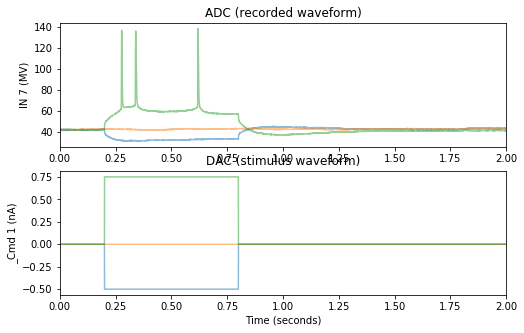

In [178]:
# example test block

curr_file = '15622019.abf'

fn = file_base_base_path + file_base_path + curr_file
# 2016_02_04_0042.abf - example from cluster 4 - burst firing
# 13d02049.abf - example from cluster 1

abf = pyabf.ABF(fn)
stim_channel_num = 1
response_chan_num = 0
stim_gain = 1
response_gain = 1

stim_end = 2

sweep_num = 0
sweep_plot_list = [0, 10, 25]
fig = plt.figure(figsize=(8, 5))

for i in sweep_plot_list:
    sweep_num = i
    abf.setSweep(sweep_num, channel=response_chan_num)
    # plot the ADC (voltage recording)
    ax1 = fig.add_subplot(211)
    ax1.set_title("ADC (recorded waveform)")
    ax1.plot(abf.sweepX, abf.sweepY*response_gain, alpha = .5)
    print(abf.sweepY[0] * response_gain)

    # plot the DAC (clamp current)
    ax2 = fig.add_subplot(212, sharex=ax1)  # <-- this argument is new
    ax2.set_title("DAC (stimulus waveform)")
    abf.setSweep(sweep_num, channel=stim_channel_num)
    #abf.setSweep(sweep_num, channel=1)
    ax2.plot(abf.sweepX, abf.sweepC * stim_gain, alpha = .5)

# decorate the plots
ax1.set_ylabel(abf.sweepLabelY)
ax2.set_xlabel(abf.sweepLabelX)
ax2.set_ylabel(abf.sweepLabelC)
ax1.axes.set_xlim(0, stim_end)  # <-- adjust axis like this
plt.show()

In [179]:
print(abf.headerText)


### ABF Class Methods ###
abf.launchInClampFit()
abf.saveABF1()
abf.setSweep()
abf.sweepD()

### ABF Class Variables ###
abfDateTime = 2015-06-22 16:24:01.281000
abfDateTimeString = 2015-06-22T16:24:01.281
abfFileComment =
abfFilePath = /Users/stripathy/Downloads/valiante_lab_ephys_mar_2020/L5/Homeira/Total5Homeira-Last-Version - with 2020 Data/15622019.abf
abfFolderPath = /Users/stripathy/Downloads/valiante_lab_ephys_mar_2020/L5/Homeira/Total5Homeira-Last-Version - with 2020 Data
abfID = 15622019
abfVersion = {'major': 2, 'minor': 6, 'bugfix': 0, 'build': 0}
abfVersionString = 2.6.0.0
adcNames = ['700A2IC', 'IN 7']
adcUnits = ['mV', 'MV']
channelCount = 2
channelList = [0, 1]
creator = Clampex 9.2.0.9
creatorVersion = {'major': 9, 'minor': 2, 'bugfix': 0, 'build': 9}
creatorVersionString = 9.2.0.9
dacNames = ['Cmd 0', '_Cmd 1']
dacUnits = ['mV', 'nA']
data = [[42.0654 42.0837 42.0471 ... 39.8132 39.8071 39.8621]
[ 0.0549  0.058   0.0488 ...  0.0458  0.0336  0.0519]]
dataByteStart = 8

/Users/stripathy/anaconda3/lib/python3.7/site-packages/pyabf/abfHeaderDisplay.py:83: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if value == "~SECTION~":
/Users/stripathy/anaconda3/lib/python3.7/site-packages/pyabf/abfHeaderDisplay.py:85: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif value == "~DOCS~":


In [1085]:
curr_file = '2016_03_03_0100.abf'
meta_row = meta_dict.loc[meta_dict['cell_id'] == curr_file]

file_path = meta_row['full_path'].values[0]

#fn = file_base_base_path + file_base_path + curr_file
# 2016_02_04_0042.abf - example from cluster 4 - burst firing
# 13d02049.abf - example from cluster 1

abf = pyabf.ABF(file_path)

stim_channel_num = int(meta_row['stim_chan'].values[0])

stim_gain = meta_row['stim_gain'].values[0]

get_stim_info(abf, stim_channel_num = stim_channel_num, stim_gain = stim_gain)

KeyError: 'full_path'

In [1086]:
meta_dict = pd.DataFrame(dict_list)
meta_dict.sort_values(by = ['abf_version'])



,abf_version,cell_id,num_sweeps,resp_chan,resp_gain,rmp_error,rmp_val,stim_amp_vec,stim_chan,stim_duration,stim_end_time,stim_gain,stim_start_time
73,1.8.3.0,2016_02_04_0015.abf,17,0,25.00,0.180359,-57.500000,"[-400.0, -350.0, -300.0, -250.0, -200.0, -150....",1,1.200000,1.600500,1,0.40060
49,1.8.3.0,15o08002.abf,20,0,20.00,7.010547,-63.700000,"[-400.0, -350.0, -300.0, -250.0, -200.0, -150....",1,1.224115,1.632663,1,0.40865
50,1.8.3.0,15o08007.abf,18,0,25.00,1.044153,-58.900000,"[-400.0, -350.0, -300.0, -250.0, -200.0, -150....",1,1.224115,1.632663,1,0.40865
52,1.8.3.0,15o08017.abf,20,0,20.00,1.171872,-57.196042,"[-400.0, -350.0, -300.0, -250.0, -200.0, -150....",1,1.224115,1.632663,1,0.40865
53,1.8.3.0,15o08020.abf,20,0,25.00,4.205701,-63.200000,"[-400.0, -350.0, -300.0, -250.0, -200.0, -150....",1,1.224115,1.632663,1,0.40865
54,1.8.3.0,15o08022.abf,17,0,20.00,4.084668,-62.300000,"[-400.0, -350.0, -300.0, -250.0, -200.0, -150....",1,1.224115,1.632663,1,0.40865
55,1.8.3.0,15o08032.abf,20,0,25.00,2.770569,-60.500000,"[-400.0, -350.0, -300.0, -250.0, -200.0, -150....",1,1.224115,1.632663,1,0.40865
56,1.8.3.0,15o08038.abf,20,0,20.00,4.028418,-59.900000,"[-400.0, -350.0, -300.0, -250.0, -200.0, -150....",1,1.224115,1.632663,1,0.40865
57,1.8.3.0,2015_11_09_0078.abf,25,0,25.00,5.429944,-61.300000,"[-400.0, -350.0, -300.0, -250.0, -200.0, -150....",1,0.960000,1.280400,1,0.32048
58,1.8.3.0,20131211_600_1_0002.abf,15,0,20.00,1.440427,-62.359616,"[-400000.0, -350000.0, -300000.0, -250000.0, -...",0,0.600000,0.764700,1000,0.16480


In [1795]:
file_base_base_path = '/Users/stripathy/Downloads/'
file_base_path = 'valiante_lab_ephys_mar_2020/'

path = file_base_base_path + file_base_path

files = [f for f in glob.glob(path + "**/*.abf", recursive=True)]


In [1796]:
import os
print(os.path.basename(files[0]))

files_list = list()
for f in files:
    base_file_name = os.path.basename(f)
    ret_dict = {'cell_id' : base_file_name, 'full_path' : f}
    files_list.append(ret_dict)
    
file_dict = pd.DataFrame(files_list)
len(file_dict)
#file_dict.sort_values(by = ['abf_version'])

19122022.abf


360

In [1797]:
file_dict = file_dict.drop_duplicates(subset=['cell_id'])
len(file_dict)

230

In [1798]:
# read in rmp data
import pandas as pd

summary_table_csv = '/Users/stripathy/rstudio_projects/valiante_ih/summary_tables/all_cells.csv'
#excel_file = file_base_base_path + 'valiante_lab_ephys_mar_2020/L23/Homeira/Total2Homeira-Lastversion_March 10_2020.xlsx'
cell_info = pd.read_csv(open(summary_table_csv, 'rb'))  
len(cell_info)

208

In [1799]:
# this is the merged dictionary with cell meta from R + file paths
merged_df = cell_info.merge(file_dict, on='cell_id', how='left')

In [1800]:
CHECK_RESPONSE_GAINS = np.array([.25, .33, .5, 1, 2, 20, 25, 50]) # these are the valid gains that Homeira /Lihua uses
def guess_response_gain(resp_vec, stated_rmp):
    # this function is a bit of logic that tries to guess the gain given an rmp value
    # try to figure out gain on response channel by comparing to RMP

    abs_diff_vec = np.abs(resp_vec[0] * CHECK_RESPONSE_GAINS - cell_rmp)
    best_gain_ind = np.argmin(abs_diff_vec)
    
    rmp_abs_error = abs_diff_vec[best_gain_ind]
    best_gain = CHECK_RESPONSE_GAINS[best_gain_ind]
    return(best_gain, rmp_abs_error)

def get_stim_gain(stim_vec):
    min_stim = np.min(stim_vec)
    if min_stim > -1:
        stim_gain = 1000
    else:
        stim_gain = 1
    return stim_gain

In [1801]:
# find sweep nums matching specific stim amplitudes

def get_stim_info(abf, stim_channel_num = 1, stim_gain = 1):
    num_sweeps = abf.sweepCount
    stim_amps = np.zeros(num_sweeps) 
    stim_start_time = None
    stim_end_time = None
    for i in range(0, num_sweeps):
        abf.setSweep(i, channel=stim_channel_num)
        sampling_rate = abf.dataRate
        stim_vec = abf.sweepC * stim_gain
        stim_amp = stim_vec[5000]

        stim_amps[i] = round(stim_amp)
        non_zero_inds = np.where(stim_vec != 0)
        stim_duration = np.shape(non_zero_inds)[1] * 1/sampling_rate
        if stim_duration == 0:
            continue
        stim_start_ind = non_zero_inds[0][0]
        stim_end_ind = non_zero_inds[0][-1]
        
        stim_start_time = abf.sweepX[stim_start_ind]
        stim_end_time = abf.sweepX[stim_end_ind]
    sampling_rate = int(round(1/(abf.sweepX[2] - abf.sweepX[1]))) # manually calculate the sampling rate

    ret_dict = {'stim_amp_vec' : stim_amps, 'stim_duration' : stim_duration, 
                'stim_start_time' : stim_start_time, 'stim_end_time' : stim_end_time, 'num_sweeps' : num_sweeps,
               'stim_sampling_rate' : sampling_rate}
    return(ret_dict)

In [1802]:
def get_stim_dict(meta_row):
    # returns path of abf file containing stim info
    # stim channel index
    # stim gain
    # other info like num sweeps, which 
    
    row = meta_row
    f = row['cell_id'].values[0]
    fn = row['full_path'].values[0]
    recorder_name = row['recorder_name'].values[0]
    abf = pyabf.ABF(fn) # loads in the abf file

    stim_info_dict = {}    

    # figure out stim channel
    stim_chan = len(abf.channelList)-1 # this seems to be generally true
    abf.setSweep(0, channel=stim_chan)
    stim_vec = abf.sweepC
    stim_gain = get_stim_gain(stim_vec)

    # this infers some basic info about stim amplitudes, durations, etc.
    stim_info_dict = get_stim_info(abf, stim_chan, stim_gain = stim_gain)
    stim_amps = stim_info_dict['stim_amp_vec']
    sampling_rate = stim_info_dict['stim_sampling_rate']
    if np.std(stim_amps) == 0 and recorder_name == 'Homeira':
        stim_chan = 0
        abf.setSweep(0, channel=stim_chan)
        stim_vec = abf.sweepC
        stim_gain = get_stim_gain(stim_vec)
        print(stim_gain)
        stim_info_dict = get_stim_info(abf, stim_chan, stim_gain = stim_gain)
    elif np.std(stim_amps) == 0 and recorder_name == 'Lihua' and num_sweeps == 30:
        # logic here is that if abf file meets these criteria, we should replace the stimulus with the one from
        # a specific abf file with available info
        abf_file_name = '14617300.abf'
        curr_row = merged_df.loc[merged_df['cell_id'] == abf_file_name]
        row = curr_row
        return get_stim_dict(row) # woo recursion
    stim_amps = stim_info_dict['stim_amp_vec']
    if np.std(stim_amps) == 0:
        valid_stim = False
    else:
        valid_stim = True
    ret_dict = {'stim_chan' : stim_chan, 'stim_gain' : stim_gain, 'stim_path' : fn, 'valid_stim' : valid_stim}
    
    ret_dict.update(stim_info_dict)
    return ret_dict



In [1803]:
abf_file_name = '14617300.abf'
curr_row = merged_df.loc[merged_df['cell_id'] == abf_file_name]
get_stim_dict(curr_row)

{'stim_chan': 0,
 'stim_gain': 1,
 'stim_path': '/Users/stripathy/Downloads/valiante_lab_ephys_mar_2020/L5/Lihua/TotalL5-Lihua-Lastversion/14617300.abf',
 'valid_stim': True,
 'stim_amp_vec': array([-400., -375., -350., ...,  275.,  300.,  325.]),
 'stim_duration': 0.6,
 'stim_start_time': 0.0656,
 'stim_end_time': 0.66556,
 'num_sweeps': 30,
 'stim_sampling_rate': 25000}

In [1804]:
# list all files in directory

import glob
import numpy as np

path = file_base_base_path + file_base_path

files = [f for f in glob.glob(path + "**/*.abf", recursive=True)]

#lihua_stim_abf = 
dict_list = list()

for abf_file in merged_df.cell_id:
    print(abf_file)
    row = merged_df.loc[merged_df['cell_id'] == abf_file]
    
    f = row['cell_id'].values[0]
    #
    fn = row['full_path'].values[0]
    #print(fn)
    resp_chan = 0
    stim_chan = 0
    stim_info_dict = {}
    
    cell_rmp = row['rmp'].values[0]
    recorder_name = row['recorder_name'].values[0]

    
    abf = pyabf.ABF(fn) # loads in the abf file
    num_sweeps = abf.sweepCount
    #print(recorder_name)
    #print(num_sweeps)
    
    if len(abf.channelList) > 2:
        print('skipping file because too many abf channels')
        continue
        stim_chan = 3
        abf.setSweep(0, channel=stim_chan)
        stim_vec = abf.sweepY
        
        resp_chan = 2
        abf.setSweep(0, channel=resp_chan)
        resp_vec = abf.sweepY
        
        stim_gain = .2
        
    else:

        # figure out response channel
        abf.setSweep(0, channel=resp_chan)
        resp_vec = abf.sweepY
        resp_sampling_rate = int(round(1/(abf.sweepX[2] - abf.sweepX[1]))) # manually calculate the sampling rate

        # try to figure out gain on response channel by comparing to RMP
        (best_gain, rmp_abs_error) = guess_response_gain(resp_vec, cell_rmp)

        stim_dict = get_stim_dict(row)
        
    
    ret_dict = {'cell_id' : f, 'resp_chan' : resp_chan, 
                    'resp_gain' : best_gain, 'rmp_error' : rmp_abs_error, 
                'rmp_val' : cell_rmp,
                'abf_version' : abf.abfVersionString, 'resp_sampling_rate' : resp_sampling_rate}
    #ret_dict = dict(ret_dict.items() + stim_info_dict.items())
    ret_dict.update(stim_dict)
    #print(ret_dict)

    dict_list.append(ret_dict)
    

meta_dict = pd.DataFrame(dict_list)



2019_11_28_0079.abf
2019_11_28_0093.abf
2020_01_06_0017.abf
2020_01_06_0048.abf
2020_01_06_0063.abf
2020_01_06_0082.abf
2020_01_06_0090.abf
2020_01_06_0095.abf
2020_01_27_0038.abf
19122022.abf
skipping file because too many abf channels
19122024.abf
skipping file because too many abf channels
19129040.abf
skipping file because too many abf channels
19129047.abf
skipping file because too many abf channels
19129043.abf
skipping file because too many abf channels
2015_11_09_0003.abf
2015_11_09_0017.abf
2015_11_09_0053.abf
2015_11_09_0085.abf
2015_11_09_0106.abf
2015_11_09_0107.abf
2016_02_25_0005.abf
2016_02_25_0007.abf
2016_02_25_0073.abf
2016_02_25_0082.abf
2016_02_25_0134.abf
2016_02_25_0255.abf
2016_03_01_0000.abf
2016_03_01_0047.abf
2016_03_03_0002.abf
2016_03_03_0054.abf
2016_03_03_0100.abf
2016_03_03_0103.abf
19122017.abf
skipping file because too many abf channels
19129057.abf
skipping file because too many abf channels
19129069.abf
skipping file because too many abf channels
1932

In [1805]:
merged_df_small = merged_df[['cell_id', 'expt_date', 'layer_name', 'recorder_name', 'full_path']]
merged_df = merged_df_small.merge(meta_dict, on='cell_id', how='left')

In [1806]:
merged_df

,cell_id,expt_date,layer_name,recorder_name,full_path,abf_version,num_sweeps,resp_chan,resp_gain,resp_sampling_rate,...,rmp_val,stim_amp_vec,stim_chan,stim_duration,stim_end_time,stim_gain,stim_path,stim_sampling_rate,stim_start_time,valid_stim
0,2019_11_28_0079.abf,2019-11-28,L3c,Homeira,/Users/stripathy/Downloads/valiante_lab_ephys_...,2.6.0.0,15.0,0.0,1.0,20000.0,...,-64.200000,"[-300.0, -250.0, -200.0, -150.0, -100.0, -50.0...",1.0,0.600000,0.692050,1.0,/Users/stripathy/Downloads/valiante_lab_ephys_...,20000.0,0.09210,True
1,2019_11_28_0093.abf,2019-11-28,L3c,Homeira,/Users/stripathy/Downloads/valiante_lab_ephys_...,2.6.0.0,15.0,0.0,1.0,20000.0,...,-65.399171,"[-300.0, -250.0, -200.0, -150.0, -100.0, -50.0...",1.0,0.600000,0.692050,1.0,/Users/stripathy/Downloads/valiante_lab_ephys_...,20000.0,0.09210,True
2,2020_01_06_0017.abf,2020-01-06,L3c,Homeira,/Users/stripathy/Downloads/valiante_lab_ephys_...,2.6.0.0,17.0,0.0,1.0,20000.0,...,-64.500000,"[-400.0, -350.0, -300.0, -250.0, -200.0, -150....",1.0,0.600000,0.692050,1.0,/Users/stripathy/Downloads/valiante_lab_ephys_...,20000.0,0.09210,True
3,2020_01_06_0048.abf,2020-01-06,L3c,Homeira,/Users/stripathy/Downloads/valiante_lab_ephys_...,2.6.0.0,17.0,0.0,1.0,20000.0,...,-60.200000,"[-400.0, -350.0, -300.0, -250.0, -200.0, -150....",1.0,0.600000,0.692050,1.0,/Users/stripathy/Downloads/valiante_lab_ephys_...,20000.0,0.09210,True
4,2020_01_06_0063.abf,2020-01-06,L3c,Homeira,/Users/stripathy/Downloads/valiante_lab_ephys_...,2.6.0.0,17.0,0.0,1.0,20000.0,...,-66.900000,"[-400.0, -350.0, -300.0, -250.0, -200.0, -150....",1.0,0.600000,0.692050,1.0,/Users/stripathy/Downloads/valiante_lab_ephys_...,20000.0,0.09210,True
5,2020_01_06_0082.abf,2020-01-06,L3c,Homeira,/Users/stripathy/Downloads/valiante_lab_ephys_...,2.6.0.0,17.0,0.0,1.0,20000.0,...,-66.700000,"[-400.0, -350.0, -300.0, -250.0, -200.0, -150....",1.0,0.600000,0.692050,1.0,/Users/stripathy/Downloads/valiante_lab_ephys_...,20000.0,0.09210,True
6,2020_01_06_0090.abf,2020-01-06,L3c,Homeira,/Users/stripathy/Downloads/valiante_lab_ephys_...,2.6.0.0,17.0,0.0,1.0,20000.0,...,-65.200000,"[-400.0, -350.0, -300.0, -250.0, -200.0, -150....",1.0,0.600000,0.692050,1.0,/Users/stripathy/Downloads/valiante_lab_ephys_...,20000.0,0.09210,True
7,2020_01_06_0095.abf,2020-01-06,L3c,Homeira,/Users/stripathy/Downloads/valiante_lab_ephys_...,2.6.0.0,17.0,0.0,1.0,20000.0,...,-73.577883,"[-400.0, -350.0, -300.0, -250.0, -200.0, -150....",1.0,0.600000,0.692050,1.0,/Users/stripathy/Downloads/valiante_lab_ephys_...,20000.0,0.09210,True
8,2020_01_27_0038.abf,2020-01-27,L3c,Homeira,/Users/stripathy/Downloads/valiante_lab_ephys_...,2.6.0.0,17.0,0.0,1.0,20000.0,...,-60.700000,"[-400.0, -350.0, -300.0, -250.0, -200.0, -150....",1.0,0.600000,0.692050,1.0,/Users/stripathy/Downloads/valiante_lab_ephys_...,20000.0,0.09210,True
9,19122022.abf,2019-01-22,L3c,Homeira,/Users/stripathy/Downloads/valiante_lab_ephys_...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1971]:
from scipy import signal

def cell_id_to_sweep_set(abf_file_name, meta_info_df = merged_df):
    
    curr_file = abf_file_name

    meta_dict = meta_info_df

    #curr_file = '15o08020.abf'

    meta_row = meta_dict.loc[meta_dict['cell_id'] == curr_file]

    file_path = meta_row['full_path'].values[0]
    stim_file_path = meta_row['stim_path'].values[0]


    resp_abf = pyabf.ABF(file_path)
    stim_abf = pyabf.ABF(stim_file_path) # for some files we're using stim traces from a different file

    num_sweeps = int(meta_row['num_sweeps'].values[0])
    stim_channel_num = int(meta_row['stim_chan'].values[0])
    response_chan_num = int(meta_row['resp_chan'].values[0])
    stim_gain = meta_row['stim_gain'].values[0]
    response_gain = meta_row['resp_gain'].values[0]

    start_time = meta_row['stim_start_time'].values[0]
    end_time = meta_row['stim_end_time'].values[0]
    resp_sampling_rate = meta_row['resp_sampling_rate'].values[0]
    stim_sampling_rate = meta_row['stim_sampling_rate'].values[0]
    stim_amps = meta_row['stim_amp_vec'].values[0]

    # curr_epoch = (int(start_time*10000), int(end_time*10000))
    # print(curr_epoch)

    clamp_mode = "CurrentClamp"

    sweep_list = list()

    for i in range(0, num_sweeps):
        sweep_num = i
        resp_abf.setSweep(sweep_num, channel=response_chan_num)

        time_vec = resp_abf.sweepX
        response_vec = resp_abf.sweepY * response_gain

        stim_abf.setSweep(sweep_num, channel=stim_channel_num)
        stim_vec = stim_abf.sweepC * stim_gain
        
        # sometimes, when we get stim from a different file, they have diff samp rates 0_o
        if stim_sampling_rate != resp_sampling_rate:
            new_stim_vec = np.zeros(len(time_vec))
            inds = np.where((time_vec > start_time) & (time_vec < end_time))
            new_stim_vec[inds] = stim_amps[i]
            stim_vec = new_stim_vec
            #stim_vec = signal.resample(stim_vec, len(time_vec))

        sweep = Sweep(t=time_vec,
                      v=response_vec,
                      i=stim_vec,
                      sampling_rate=sampling_rate,
                      sweep_number=i,
                      clamp_mode=clamp_mode,
                      #epochs = curr_epoch
                      )
        sweep_list.append(sweep)
    sweep_set = SweepSet(sweep_list)
    return(sweep_set, start_time, end_time)

In [1807]:
def plot_ephys_from_abf(abf_file_name, meta_dict = merged_df):
    
    curr_file = abf_file_name

    #curr_file = '15o08020.abf'

    meta_row = meta_dict.loc[meta_dict['cell_id'] == curr_file]
    
    file_path = meta_row['full_path'].values[0]
    stim_file_path = meta_row['stim_path'].values[0]
    #fn = file_base_base_path + file_base_path + curr_file
    # 2016_02_04_0042.abf - example from cluster 4 - burst firing
    # 13d02049.abf - example from cluster 1

    resp_abf = pyabf.ABF(file_path)
    stim_abf = pyabf.ABF(stim_file_path) # for some files we're using stim traces from a different file

    num_sweeps = int(meta_row['num_sweeps'].values[0])
    stim_channel_num = int(meta_row['stim_chan'].values[0])
    response_chan_num = int(meta_row['resp_chan'].values[0])
    stim_gain = meta_row['stim_gain'].values[0]
    response_gain = meta_row['resp_gain'].values[0]
    
    stim_start_time = meta_row['stim_start_time'].values[0]
    stim_end_time = meta_row['stim_end_time'].values[0]
    
    #stim_end = 2

    sweep_num = 0
    sweep_plot_list = [0, 10, num_sweeps-1]

    fig = plt.figure(figsize=(8, 5))

    for i in sweep_plot_list:
        sweep_num = i
        resp_abf.setSweep(sweep_num, channel=response_chan_num)
        # plot the ADC (voltage recording)
        ax1 = fig.add_subplot(211)
        ax1.set_title("ADC (recorded waveform)")
        ax1.plot(resp_abf.sweepX, resp_abf.sweepY*response_gain, alpha = .5)

        # plot the DAC (clamp current)
        ax2 = fig.add_subplot(212, sharex=ax1)  # <-- this argument is new
        ax2.set_title("DAC (stimulus waveform)")
        stim_abf.setSweep(sweep_num, channel=stim_channel_num)
        #abf.setSweep(sweep_num, channel=1)
        ax2.plot(stim_abf.sweepX, stim_abf.sweepC * stim_gain, alpha = .5)

    # decorate the plots
    ax1.set_ylabel(resp_abf.sweepLabelY)
    ax2.set_xlabel(resp_abf.sweepLabelX)
    ax2.set_ylabel(resp_abf.sweepLabelC)
    ax1.axes.set_xlim(0, stim_end_time + .25)  # <-- adjust axis like this
    plt.show()

In [2020]:
from ipfx.feature_extractor import SpikeTrainFeatureExtractor
from ipfx.stimulus_protocol_analysis import LongSquareAnalysis

# We configure a SpikeFeatureExtractor and SpikeTrainFeatureExtractor that the analysis object will use

#bessel_filter_khz = sampling_rate / 10000 * 2.5
bessel_filter_khz = 1

def get_lsa_results(sweep_set, start_time, end_time):
    spike_extractor = SpikeFeatureExtractor(start=start_time, end=end_time, filter = bessel_filter_khz)
    spike_train_extractor = SpikeTrainFeatureExtractor(start=start_time, end=end_time, baseline_interval = .05)

    # Create the analysis object
    lsa = LongSquareAnalysis(spx=spike_extractor,
                             sptx=spike_train_extractor,
                             subthresh_min_amp=-400, 
                            )
    lsa_results = lsa.analyze(sweep_set)
    return lsa_results


In [2021]:
merged_df.query('recorder_name == "Lihua"').sort_values(by = ['expt_date'])

,cell_id,expt_date,layer_name,recorder_name,full_path,abf_version,num_sweeps,resp_chan,resp_gain,resp_sampling_rate,...,rmp_val,stim_amp_vec,stim_chan,stim_duration,stim_end_time,stim_gain,stim_path,stim_sampling_rate,stim_start_time,valid_stim
172,14304300.abf,2014-03-04,L2.3,Lihua,/Users/stripathy/Downloads/valiante_lab_ephys_...,2.0.0.0,30.0,0.0,1.0,10000.0,...,-63.385011,"[-400.0, -375.0, -350.0, -325.0, -300.0, -275....",0.0,0.6,0.66556,1.0,/Users/stripathy/Downloads/valiante_lab_ephys_...,25000.0,0.0656,True
173,14304311.abf,2014-03-04,L2.3,Lihua,/Users/stripathy/Downloads/valiante_lab_ephys_...,2.0.0.0,30.0,0.0,1.0,10000.0,...,-79.345705,"[-400.0, -375.0, -350.0, -325.0, -300.0, -275....",0.0,0.6,0.66556,1.0,/Users/stripathy/Downloads/valiante_lab_ephys_...,25000.0,0.0656,True
174,14317300.abf,2014-03-17,L2.3,Lihua,/Users/stripathy/Downloads/valiante_lab_ephys_...,2.0.0.0,30.0,0.0,1.0,10000.0,...,-74.813844,"[-400.0, -375.0, -350.0, -325.0, -300.0, -275....",0.0,0.6,0.66556,1.0,/Users/stripathy/Downloads/valiante_lab_ephys_...,25000.0,0.0656,True
175,14317320.abf,2014-03-17,L2.3,Lihua,/Users/stripathy/Downloads/valiante_lab_ephys_...,2.0.0.0,30.0,0.0,1.0,10000.0,...,-73.989870,"[-400.0, -375.0, -350.0, -325.0, -300.0, -275....",0.0,0.6,0.66556,1.0,/Users/stripathy/Downloads/valiante_lab_ephys_...,25000.0,0.0656,True
176,14317348.abf,2014-03-17,L2.3,Lihua,/Users/stripathy/Downloads/valiante_lab_ephys_...,2.0.0.0,30.0,0.0,1.0,10000.0,...,-73.364259,"[-400.0, -375.0, -350.0, -325.0, -300.0, -275....",0.0,0.6,0.66556,1.0,/Users/stripathy/Downloads/valiante_lab_ephys_...,25000.0,0.0656,True
177,14318308.abf,2014-03-18,L2.3,Lihua,/Users/stripathy/Downloads/valiante_lab_ephys_...,2.0.0.0,30.0,0.0,1.0,10000.0,...,-72.769167,"[-400.0, -375.0, -350.0, -325.0, -300.0, -275....",0.0,0.6,0.66556,1.0,/Users/stripathy/Downloads/valiante_lab_ephys_...,25000.0,0.0656,True
178,14408304.abf,2014-04-08,L2.3,Lihua,/Users/stripathy/Downloads/valiante_lab_ephys_...,2.0.0.0,25.0,0.0,1.0,10000.0,...,-77.301027,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,NaN,1000.0,/Users/stripathy/Downloads/valiante_lab_ephys_...,10000.0,NaN,False
122,14424000.abf,2014-04-22,L5,Lihua,/Users/stripathy/Downloads/valiante_lab_ephys_...,2.0.0.0,25.0,0.0,1.0,25000.0,...,-74.035646,"[-400.0, -375.0, -350.0, -325.0, -300.0, -275....",0.0,0.6,0.66556,1.0,/Users/stripathy/Downloads/valiante_lab_ephys_...,25000.0,0.0656,True
124,14424335.abf,2014-04-22,L5,Lihua,/Users/stripathy/Downloads/valiante_lab_ephys_...,2.0.0.0,30.0,0.0,1.0,10000.0,...,-72.219850,"[-400.0, -375.0, -350.0, -325.0, -300.0, -275....",0.0,0.6,0.66556,1.0,/Users/stripathy/Downloads/valiante_lab_ephys_...,25000.0,0.0656,True
123,14424329.abf,2014-04-22,L5,Lihua,/Users/stripathy/Downloads/valiante_lab_ephys_...,2.0.0.0,30.0,0.0,1.0,25000.0,...,-74.020387,"[-400.0, -375.0, -350.0, -325.0, -300.0, -275....",0.0,0.6,0.66556,1.0,/Users/stripathy/Downloads/valiante_lab_ephys_...,25000.0,0.0656,True


/Users/stripathy/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/Users/stripathy/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/Users/stripathy/anaconda3/lib/python3.7/site-packages

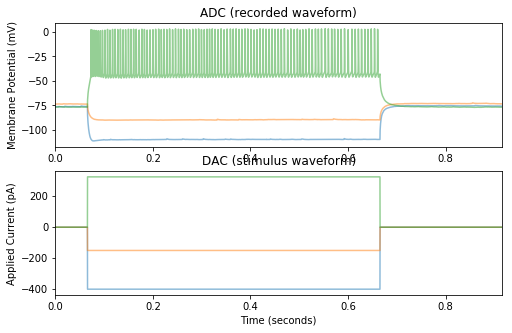

In [2033]:

abf_file_name = '15127041.abf'

plot_ephys_from_abf(abf_file_name, merged_df)
(sweep_set, start_time, end_time) = cell_id_to_sweep_set(abf_file_name, meta_info_df = merged_df)

#14617300.abf - FS interneuron
#15616008.abf

/Users/stripathy/anaconda3/lib/python3.7/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


(-300, 705.0)

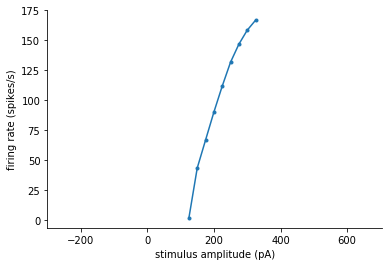

In [2034]:
lsa_results = get_lsa_results(sweep_set, start_time, end_time)
#print(lsa_results)

import seaborn as sns
spiking_df = lsa_results["spiking_sweeps"]

plt.plot(spiking_df["stim_amp"], spiking_df["avg_rate"], '.-')
sns.despine()
plt.xlabel("stimulus amplitude (pA)")
plt.ylabel("firing rate (spikes/s)")
plt.xlim(-300, stim_amps[-1] + 5)

In [2036]:
from ipfx.feature_extractor import SpikeFeatureExtractor

# Create and configure extractor
bessel_filter_khz = 1
spike_extractor = SpikeFeatureExtractor(start=start_time, end=end_time, filter = bessel_filter_khz)

#extractor = SpikeFeatureExtractor(start=1.02, end=2.02)

# Apply extractor to trace
sweep = sweep_set.sweeps[1]
print(sweep.sampling_rate)
results_df = extractor.process(sweep.t, sweep.v, sweep.i)

results_df

25000.0


""


In [2037]:
lsa_results['spiking_sweeps']

,adapt,avg_rate,first_isi,isi_cv,latency,mean_isi,median_isi,peak_deflect,sag,stim_amp,v_baseline
21,NaN,1.666778,NaN,NaN,0.0560,NaN,NaN,"(0.0793457, 1227)",-8.673881,125.0,-73.800659
22,0.029067,43.336222,0.0065,0.234180,0.0242,0.022824,0.0245,"(1.550293, 5519)",-7.382221,150.0,-74.167038
23,0.018810,66.671111,0.0050,0.240408,0.0161,0.014733,0.0149,"(2.2277832, 6363)",-6.604050,175.0,-74.059456
24,0.012616,90.006000,0.0039,0.211721,0.0132,0.010947,0.0112,"(2.368164, 3582)",-6.239684,200.0,-75.557846
25,0.009227,111.674112,0.0029,0.185132,0.0113,0.008824,0.0092,"(2.3254395, 6319)",-5.993699,225.0,-76.064888
26,0.007934,131.675445,0.0028,0.165155,0.0098,0.007481,0.0077,"(2.9663086, 5841)",-5.485139,250.0,-76.338097
27,0.006161,146.676445,0.0027,0.155494,0.0085,0.006729,0.0068,"(3.3996582, 6230)",-5.347871,275.0,-76.864174
28,0.004967,158.343890,0.0028,0.147727,0.0072,0.006253,0.0063,"(3.2348633, 5267)",-4.942610,300.0,-76.871155
29,0.004019,166.677779,0.0029,0.130188,0.0063,0.005937,0.0060,"(3.35083, 5533)",-4.742314,325.0,-76.824020


In [2038]:
lsa_results['input_resistance']

91.08363560267888

In [2039]:
lsa_results['rheobase_sweep'].name

21

(-300, 705.0)

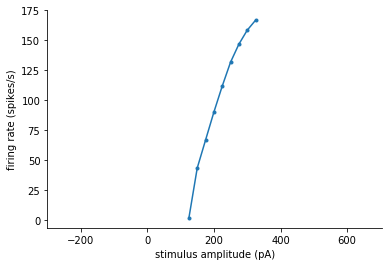

In [2040]:
import seaborn as sns
spiking_df = lsa_results["spiking_sweeps"]

plt.plot(spiking_df["stim_amp"], spiking_df["avg_rate"], '.-')
sns.despine()
plt.xlabel("stimulus amplitude (pA)")
plt.ylabel("firing rate (spikes/s)")
plt.xlim(-300, stim_amps[-1] + 5)

In [2041]:
lsa_results["subthreshold_sweeps"]

,adapt,avg_rate,first_isi,isi_cv,latency,mean_isi,median_isi,peak_deflect,sag,stim_amp,v_baseline
0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,"(-111.39526, 783)",0.041596,-400.0,-76.245789
1,NaN,0.0,NaN,NaN,NaN,NaN,NaN,"(-109.32007, 780)",0.034718,-375.0,-75.705185
2,NaN,0.0,NaN,NaN,NaN,NaN,NaN,"(-107.34863, 810)",0.033242,-350.0,-75.339249
3,NaN,0.0,NaN,NaN,NaN,NaN,NaN,"(-105.35278, 821)",0.036971,-325.0,-75.102844
4,NaN,0.0,NaN,NaN,NaN,NaN,NaN,"(-103.25928, 836)",0.028418,-300.0,-74.764908
5,NaN,0.0,NaN,NaN,NaN,NaN,NaN,"(-101.18408, 820)",0.029804,-275.0,-74.522659
6,NaN,0.0,NaN,NaN,NaN,NaN,NaN,"(-98.88916, 1207)",0.015313,-250.0,-74.187805
7,NaN,0.0,NaN,NaN,NaN,NaN,NaN,"(-96.917725, 1237)",0.022640,-225.0,-74.033875
8,NaN,0.0,NaN,NaN,NaN,NaN,NaN,"(-94.58008, 1313)",0.009428,-200.0,-73.567749
9,NaN,0.0,NaN,NaN,NaN,NaN,NaN,"(-92.63916, 1187)",0.019635,-175.0,-73.779938


In [2042]:
import ipfx.feature_vectors as fv

result = {}
lsq_features = lsa_results

# same start and end time as previously defined
lsq_start = start
lsq_end = end
print(start)
print(end)

extend_duration_val = .02

lsq_sweeps = sweep_set 
(subthresh_hyperpol_dict, hyperpol_deflect_dict) = fv.identify_subthreshold_hyperpol_with_amplitudes(lsq_features,
    lsq_sweeps)
print(hyperpol_deflect_dict)
target_amps_for_step_subthresh = [-200, -150, -100, -50]

result["step_subthresh"] = fv.step_subthreshold(subthresh_hyperpol_dict, target_amps_for_step_subthresh, 
                                                lsq_start, lsq_end, amp_tolerance=5, 
                                                extend_duration= extend_duration_val)
result["subthresh_norm"] = fv.subthresh_norm(subthresh_hyperpol_dict, hyperpol_deflect_dict, 
                                             lsq_start, lsq_end, 
                                             extend_duration= extend_duration_val)
(subthresh_depol_dict, depol_deflect_dict) = fv.identify_subthreshold_depol_with_amplitudes(lsq_features, 
                                                                                            lsq_sweeps)
result["subthresh_depol_norm"] = fv.subthresh_depol_norm(subthresh_depol_dict,
    depol_deflect_dict, lsq_start, lsq_end, 
                                                         extend_duration= extend_duration_val)
isi_sweep, isi_sweep_spike_info = fv.identify_sweep_for_isi_shape(
    lsq_sweeps, lsq_features, lsq_end - lsq_start)
result["isi_shape"] = fv.isi_shape(isi_sweep, isi_sweep_spike_info, lsq_end)

0.026240000000000003
0.26620000000000005
{-400.0: (-76.24578857421875, -111.39526), -375.0: (-75.70518493652344, -109.32007), -350.0: (-75.33924865722656, -107.34863), -325.0: (-75.10284423828125, -105.35278), -300.0: (-74.76490783691406, -103.25928), -275.0: (-74.52265930175781, -101.18408), -250.0: (-74.18780517578125, -98.88916), -225.0: (-74.03387451171875, -96.917725), -200.0: (-73.5677490234375, -94.58008), -175.0: (-73.77993774414062, -92.63916), -150.0: (-73.63518524169922, -90.24048), -125.0: (-73.40911865234375, -87.64038), -100.0: (-73.44648742675781, -85.37598), -75.0: (-73.54325103759766, -82.647705), -50.0: (-73.59294891357422, -79.992676), -25.0: (-73.546142578125, -77.00806)}
{'step_subthresh': array([-73.709 , -73.7166, -73.6729, ..., -79.5881, -79.7172, -79.6635],
      dtype=float32), 'subthresh_norm': array([ 0.0038,  0.0001,  0.0036, ..., -0.9751, -0.9804, -0.9796],
      dtype=float32), 'subthresh_depol_norm': array([-0.0071, -0.008 , -0.0085, ...,  0.9912,  0.993

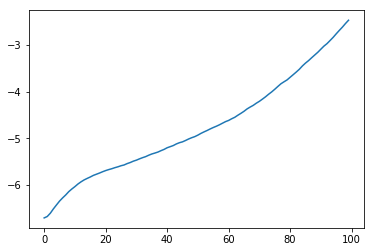

In [2043]:
plt.plot(result["isi_shape"])

In [681]:
start_index

1600

In [672]:
lsq_sweeps.sweeps[0]

In [1945]:
import numpy as np

target_amplitudes = np.asarray([0, 50, 100, 150, 200, 250, 300, 350, 400])
supra_info_list = fv.identify_suprathreshold_spike_info(
    lsq_features, target_amplitudes, shift=10)
result["psth"] = fv.psth_vector(supra_info_list, lsq_start, lsq_end)
result["inst_freq"] = fv.inst_freq_vector(supra_info_list, lsq_start, lsq_end)

spike_feature_list = [
    "upstroke_downstroke_ratio",
    "peak_v",
    "fast_trough_v",
    "threshold_v",
    "width",
]
for feature in spike_feature_list:
    result["spiking_" + feature] = fv.spike_feature_vector(feature,
        supra_info_list, lsq_start, lsq_end)

plt.plot(result['spiking_peak_v'])


ValueError: array of sample points is empty